In [1]:
#import Neccessory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score



import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Read csv file and convert into dataframe
df = pd.read_csv(r"WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
#lets check the null values in dataframe
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Greate we don't have any null values in our data set.

In [4]:
#look at the info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## EDA

In [5]:
#AT first lets convert our dependent variable (label) into numeric data
from sklearn.preprocessing import LabelEncoder
leb_enc = LabelEncoder()
df2 = leb_enc.fit_transform(df["Attrition"])
pd.Series(df2)
df["Attrition"] = df2

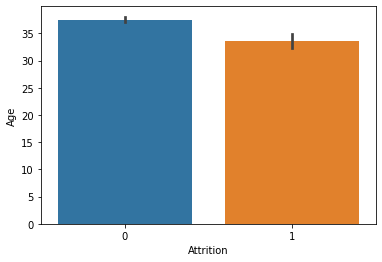

In [6]:
#lets have a look on relation of every columns with attrition
#age v/s attririon
sns.barplot(x = "Attrition", y="Age", data = df)
plt.show()

we can say that employees with more age than 33 years are more likely to stay in the company compared to employees with lesser age.

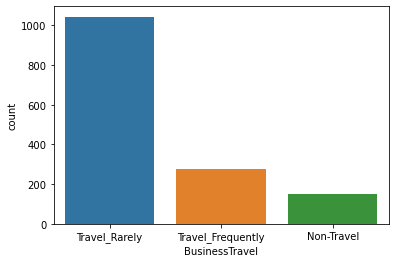

In [7]:
#lets have a look on BusinessTravel column
sns.countplot(x = "BusinessTravel", data = df)
plt.show()

This feature is having data of business related travel entries. Most of the elmployees travel rarely.

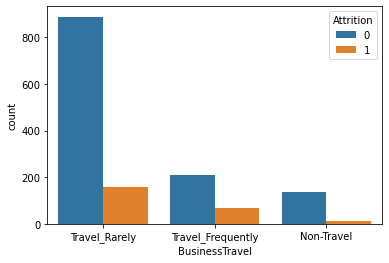

In [8]:
#lets visualize the relation of BusinessTravel with Attrition
sns.countplot(x = "BusinessTravel", hue="Attrition", data=df )
plt.show()

Here we can say when employees has to travel rarely or they don't have to travel the attrition is comparitively less.

While when employees travels frequently the proportion of attrition increases.

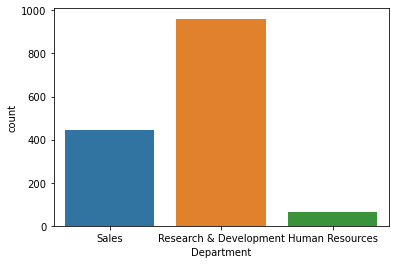

In [9]:
#lets look at the number of employees in each department
sns.countplot(x= "Department", data=df)
plt.show()

There are more number of employees in the department of Research and Development compared to sales and Human Resource department.

Human Resources department has very less number of employees.

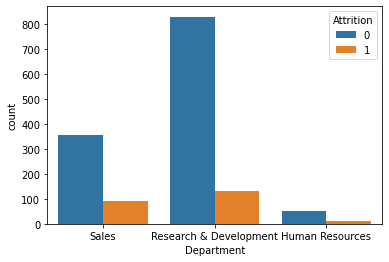

In [10]:
#lets visualize the relation of attrition with departments
sns.countplot(x= "Department", hue = "Attrition", data=df)
plt.show()

We can say R & D department is more stable compared to rest two. As the ratio of attrition in sales and HR department is arround 1:4
    
Where as in R&D department it is 1:9

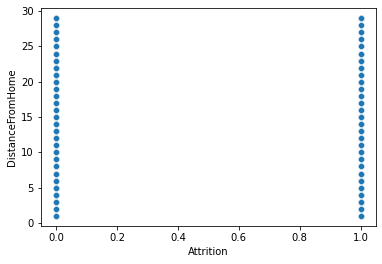

In [11]:
#lets see how the distance from home affects attrition
sns.scatterplot( x = 'Attrition', y = 'DistanceFromHome', data = df)
plt.show()

* It looks quite difficult to conclude anything from this plot. here we can plot number of attrition (yes/no) for specific range of distance. 

* For that we need to devide the distance into two different ranges.

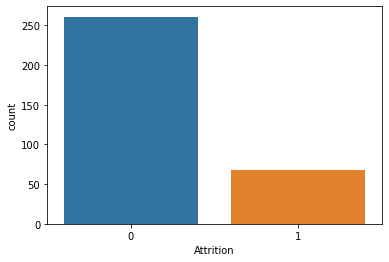

In [12]:
#lets chcek when distance is above 15 kms how attrition occurs
sns.countplot(x = "Attrition", data = df.loc[df["DistanceFromHome"]>15])
plt.show()

* By looking at the plot we can say at higher distance from home, nymber of attrition is very less.

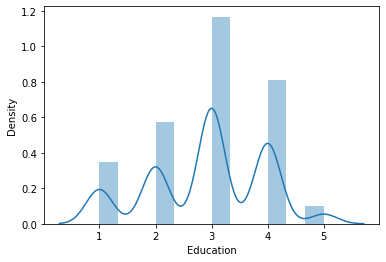

In [13]:
#lets see how education parameter is given
sns.distplot(df['Education'])
plt.show()

* The education is given in the range of 1 to 5, from this plot it looks like at level 3 the number of counts is maximum.

* Lets visualize using count plot.

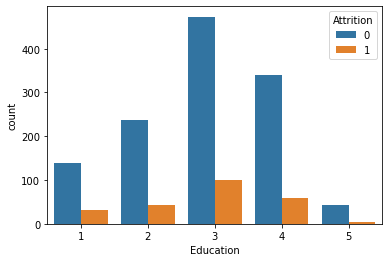

In [14]:
sns.countplot(x= "Education", hue = "Attrition", data=df)
plt.show()

* It seems like this feature is not affects much to attrition, as the ratio of attrition at every level looks nearly same.

In [15]:
#lets check elements in the column - EducationField
df["EducationField"].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

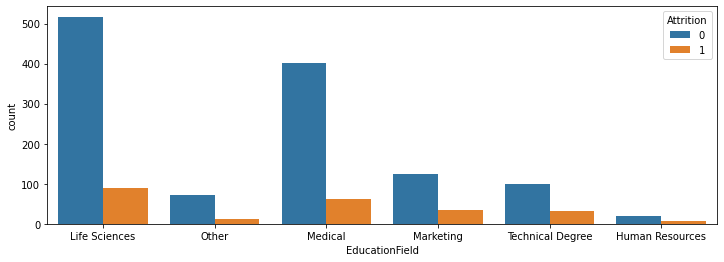

In [16]:
#visualize the data in the column EducationField using countplot
plt.figure(figsize=(12,4))
sns.countplot( x = "EducationField", hue = "Attrition", data = df )
plt.show()

* There are more number of employees from life science and medical fields. and also less atrition is observed in the employees from these fields.

* Very less number of employees belongs to HR and Other fields, and employees from HR field has more attrition rate.

* Employees from technical and marketing fields are moderate in number and has attrition ratio around 3:10

In [17]:
#lets check entries in the column EmployeeCount
df['EmployeeCount'].unique()

array([1], dtype=int64)

In [18]:
#here in the column EmployeeCount having same entries in entire dataset, so we can drop this feature
df.drop(columns = 'EmployeeCount', inplace = True)

In [19]:
#lets check the entries in the column EmployeeNumber
df["EmployeeNumber"].value_counts()
#this will tell us this feature is not contributing to attrition, so we can drop this

2048    1
1368    1
1364    1
1363    1
1362    1
       ..
648     1
647     1
645     1
644     1
2046    1
Name: EmployeeNumber, Length: 1470, dtype: int64

In [20]:
df.drop(columns = "EmployeeNumber", inplace = True)

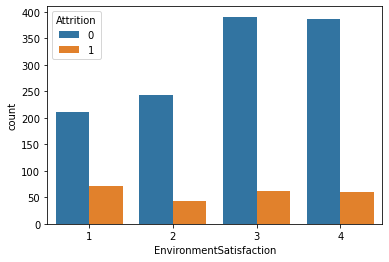

In [21]:
#lets have a look at EnvironmentSatisfaction feature
sns.countplot( x = "EnvironmentSatisfaction", hue = "Attrition", data = df)
plt.show()

* The EnvironmentSatisfaction is given in 4 different levels.

* At higher EnvironmentSatisfaction that is 3 & 4 the attrition ratio is very less whereas at lower EnvironmentSatisfaction at 1, the ratio becomes more.

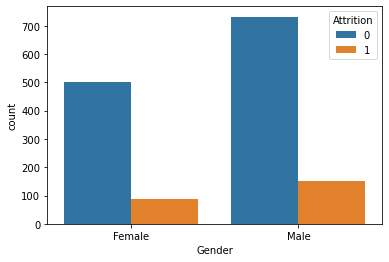

In [22]:
#lets chcek the attrition ratio based on employee gender
sns.countplot(x = "Gender", hue="Attrition", data=df)
plt.show()

* Attrition rate looks slightly more in the case of female employees than male employees.

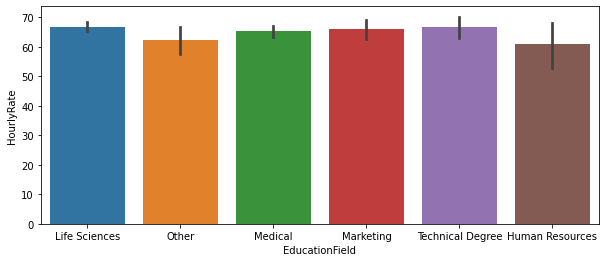

In [23]:
#The HourlyRate may be depends on Education fields, lets have a look
plt.figure(figsize=(10,4))
sns.barplot(x = "EducationField", y = "HourlyRate", data = df)
plt.show()

* the HourlyRate is quite less in the case of HR and Other fields compared to other departments.

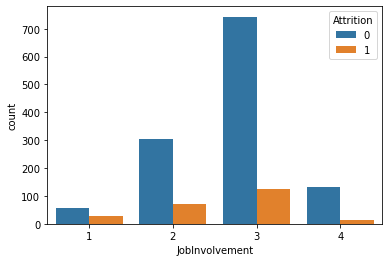

In [24]:
#lets see how job involvement affects attrition 
sns.countplot( x = "JobInvolvement", hue = "Attrition", data = df)
plt.show()

* It shows if the job involvement is less then the attrition will be more.

* At higher job involvement the attrition rate will be less

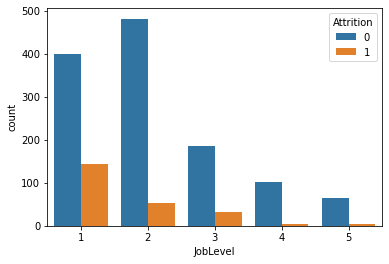

In [25]:
#JobLevel v/s Attrition
sns.countplot(x = "JobLevel", hue = "Attrition", data = df)
plt.show()

* We can see at maximum job attrition will found at lower job level.

* the attrition rate is much lower at higher job level compared to lower job level.

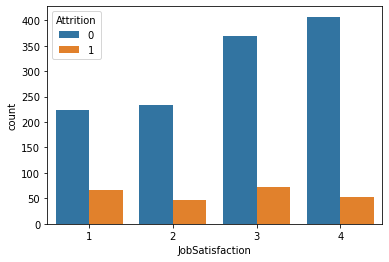

In [26]:
#lets see effect of JobSatisfaction on attrition
sns.countplot( x = "JobSatisfaction", hue = "Attrition", data = df)
plt.show()

* Here also we can say if employee is much satisfied with what he is doing the attrition rate becomes lower

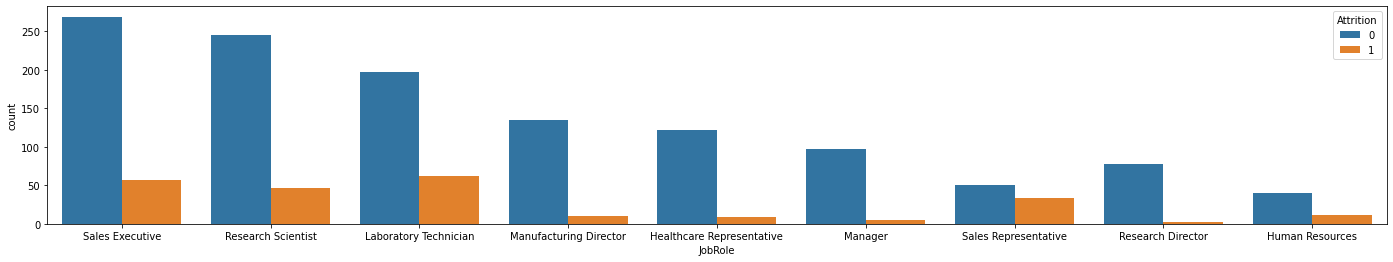

In [27]:
#Lets chcek the attrition based on each job role
plt.figure(figsize=(24,4))
sns.countplot(x = "JobRole", hue = "Attrition", data=df)
plt.show()

* From this we can analyze the attrition ratio with respect to every category.

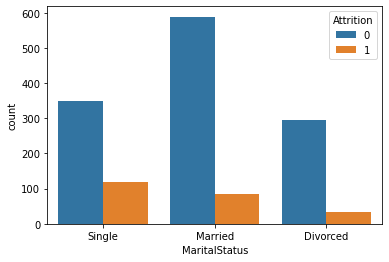

In [28]:
#Lets chcek the attrition ratio in MaritalStatus
sns.countplot(x = "MaritalStatus", hue="Attrition", data=df)
plt.show()

* The attrition rate is more in the case of singals compared to other two categories.

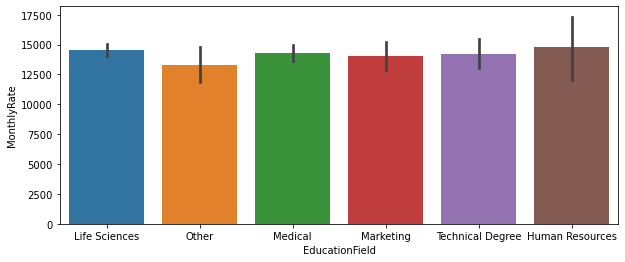

In [29]:
# the monthly rate may be depends on education field, lets check
plt.figure(figsize=(10,4))
sns.barplot( x = "EducationField", y = "MonthlyRate", data = df)
plt.show()

* From above bar plot we can say the monthly income is less for other fields compared to rest

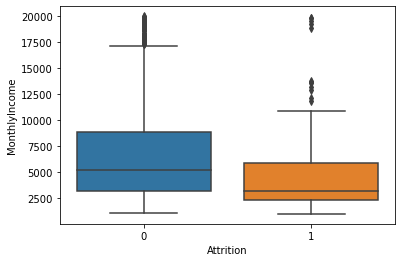

In [30]:
#lets see how MonthlyIncome will affects Attrition
sns.boxplot(x = "Attrition", y = "MonthlyIncome", data = df)
plt.show()

* This will tell us at higher monthly rates the attrition is less.

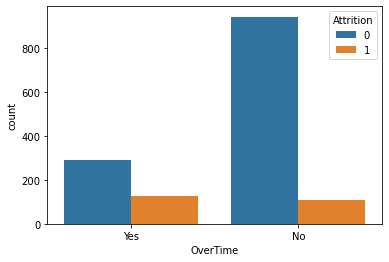

In [31]:
#Lets compare attrition based on overtime
sns.countplot(x = "OverTime", hue = "Attrition", data=df)
plt.show()
#Below if graph clearly shows if overtime is there then attrition proportion is higher

* we can say employees that are not doing overtime has very less attrition rates than that of who are doing overtime.

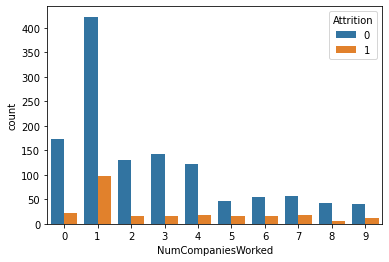

In [32]:
# lets check effect of NumCompaniesWorked on attrition rate
sns.countplot(x = "NumCompaniesWorked", hue = "Attrition", data = df)
plt.show()

* Freshers has very less attrition rate compared to others



In [33]:
#lets hav a look on Over18 columns
df["Over18"].unique()
#this column has only one type of entry, its not giving any contribution to attrition, we can drop this feature

array(['Y'], dtype=object)

In [34]:
df.drop(columns = "Over18", inplace = True)

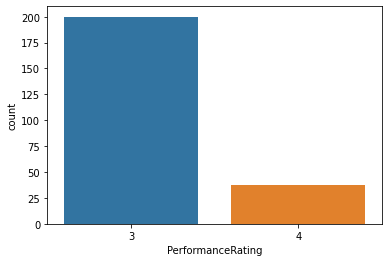

In [35]:
#Now lets check how performnce rating is afecting attrition level
sns.countplot(x = "PerformanceRating", data = df.loc[df["Attrition"]==1])
plt.show()

May be since employees expect that their work deserves more rating and is undervalued,
almost all the people left who got performance rating 3.

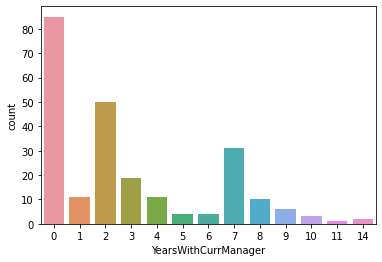

In [36]:
#Lets have a look on how YearsWithCurrManager will affects attrition
sns.countplot(x = "YearsWithCurrManager", data = df.loc[df["Attrition"]==1])
plt.show()

* Here we can see if YearsWithCurrManager is 0 the attrition rate becomes very high, and same in the case of employees who are working for 2 years as a current manager left the jobs.

* It may be due to the lack of interest in new projects or new working environment anything like that.


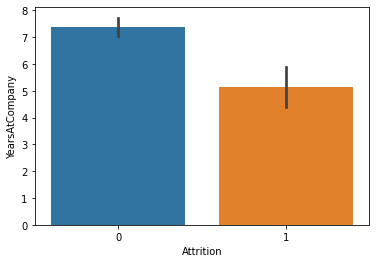

In [37]:
# Attrition rates based on working years of the employees 
sns.barplot(x = "Attrition", y = "YearsAtCompany", data=df)
plt.show()


* here we get what is the average number of years employee is staying in the company before leaving

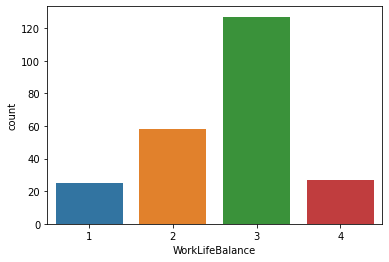

In [38]:
#lets chcek the work life balance with attrition
sns.countplot(x = "WorkLifeBalance", data = df.loc[df["Attrition"]==1])
plt.show()

In [39]:
#lets check the entries in StandardHours column
df["StandardHours"].unique()
#Here we see that StandardHours has same value throughout

array([80], dtype=int64)

In [40]:
#Lets drop StandardHours as it will not proovide any infrmation
df.drop(columns = "StandardHours", inplace = True)

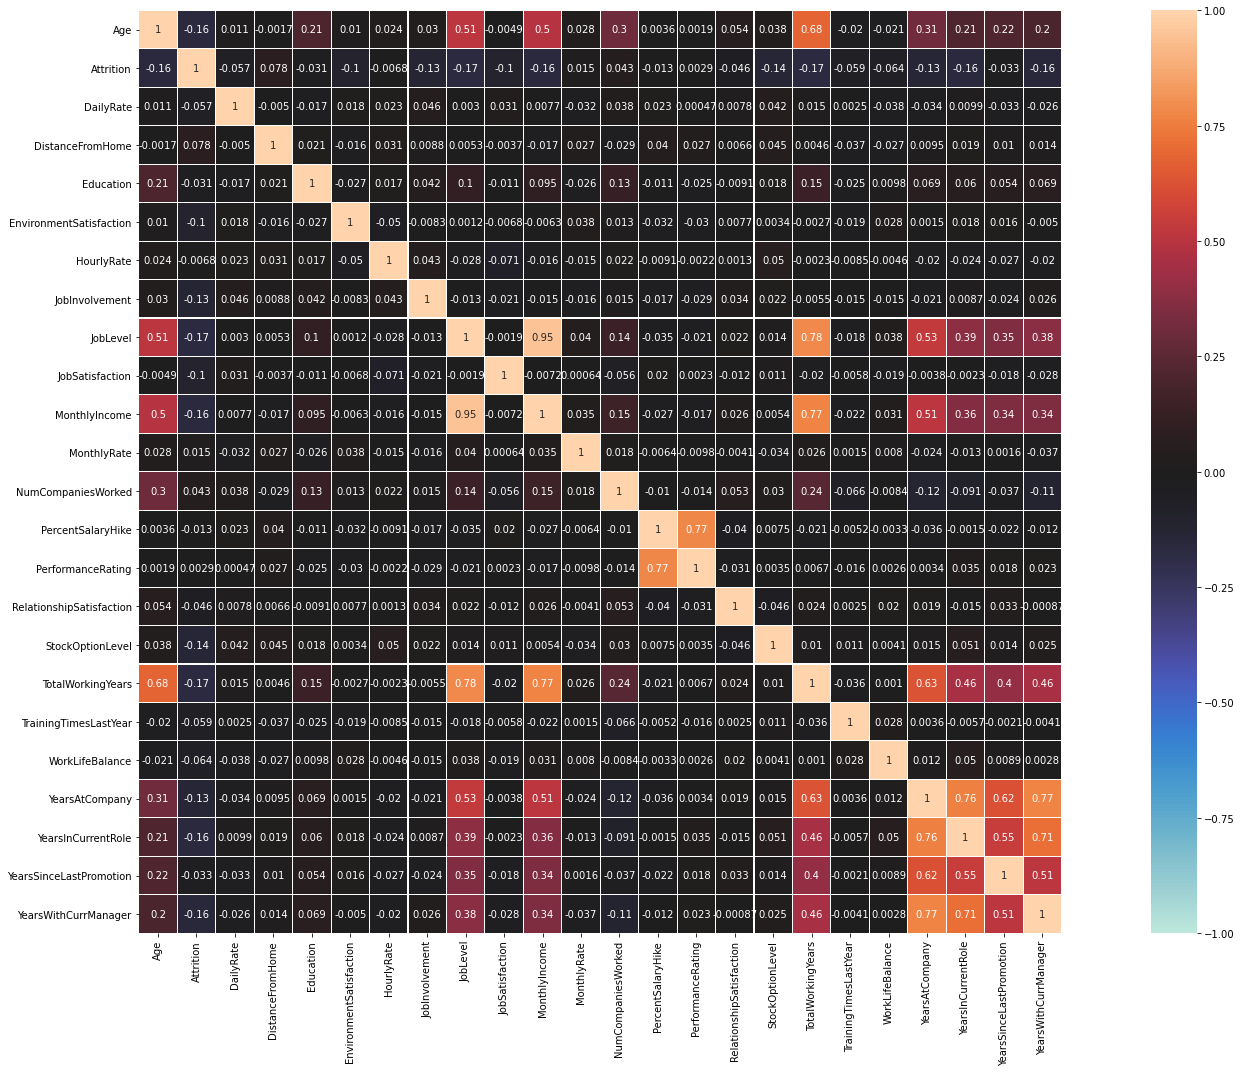

In [41]:
#Lets plot heatmap to check correlation among differnt features and label
df_corr = df.corr()
plt.figure(figsize = (25,15))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=0.1)
plt.tight_layout()

* From heat map we can say that the features monthly income is totally arround 95% depends on jib level of employee.

* Features like age, job level, monthlyincome, Totalworkingyears, years at company, years in current role, years since last promotion, and years with current manager are showing some relation between one another.

* Other features are not showing strong relation between them.

* All features are giving very small contribution to attrition.

In [42]:
#Lets check descrption of our data
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


* Lookin at the data we can say there may be some outliers, lets go for skewness checking

In [43]:
#Lets check skewness in our dataset
print(df.skew())
print('--------------------------------------------------')
print("Number of feature showing significant skewness: ",len(df.skew().loc[(df.skew())>0.5]))

Age                         0.413286
Attrition                   1.844366
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64
--------------------------------------------------
Number of feature showing significant skewness

In [44]:
# At first we will remove outliers from our data. thereafter again will check skewness
# Applying zscore method for removing outliers from skewed features
from scipy import stats
from scipy.stats import zscore
z_score = zscore(df[["DistanceFromHome","JobLevel","MonthlyIncome","NumCompaniesWorked","PercentSalaryHike","PerformanceRating","StockOptionLevel","TotalWorkingYears","TrainingTimesLastYear","WorkLifeBalance","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"]])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


* After removing outliers from the data we are loosing about 5% data, we can consider it is safe to remove outliers

In [45]:
#Lets check the skewness again after removing outliers
print(df.skew())
print('--------------------------------------------------')
print("Number of feature showing significant skewness: ",len(df.skew().loc[(df.skew())>0.5]))

Age                         0.472280
Attrition                   1.805983
DailyRate                  -0.017078
DistanceFromHome            0.954752
Education                  -0.289024
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobSatisfaction            -0.345612
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany              1.248623
YearsInCurrentRole          0.726675
YearsSinceLastPromotion     1.756335
YearsWithCurrManager        0.694506
dtype: float64
--------------------------------------------------
Number of feature showing significant skewness

* After removing outliers we reduced some skewness in features, but still there is significant skewness is observed.

* so we need to treat this skewness.

In [46]:
# first we need to saperate our data intp label and features
x = df.drop(columns = ["Attrition"])
y = df["Attrition"]

In [47]:
#Lets treat the skewed data
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.log1p(x[index])
    if x.skew().loc[index]<-0.5:
        x[index]=np.square(x[index])

In [48]:
#check the skewness after treating it
x.skew()

Age                         0.472280
DailyRate                  -0.017078
DistanceFromHome           -0.031570
Education                  -0.289024
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement              0.329667
JobLevel                    0.497167
JobSatisfaction            -0.345612
MonthlyIncome               0.318873
MonthlyRate                 0.030596
NumCompaniesWorked          0.101288
PercentSalaryHike           0.496106
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.275912
TotalWorkingYears           0.241110
TrainingTimesLastYear       0.513454
WorkLifeBalance             0.299233
YearsAtCompany             -0.379527
YearsInCurrentRole         -0.390406
YearsSinceLastPromotion     0.695348
YearsWithCurrManager       -0.347018
dtype: float64

* After treating skewness we reduced skewed features from 14 to 3, still skewness is there in three feature.

In [49]:
#Lets select numeric features only for scaling to standard form
numeric_data = x.select_dtypes(include=[np.number])
numeric_data.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [50]:
#lets convert categorical data into numeric values, using label encoder
leb_enc = LabelEncoder()
for i in x.columns:
    if x[i].dtypes == "object":
        x[i] = leb_enc.fit_transform(x[i])

In [51]:
#Lets have a look on our target variable value count
y.value_counts()

0    1158
1     229
Name: Attrition, dtype: int64

In [52]:
#it looks the data is imbalance
#lets do oversampling using SMOTE
import imblearn
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_over,y_over = SM.fit_resample(x,y)

In [55]:
num_data = x_over.drop(columns = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime'])

In [56]:
#Lets bring all numerical features to common scale
scaler = StandardScaler()
x_num = scaler.fit_transform(num_data)
x_num = pd.DataFrame(x_num,columns=num_data.columns)

In [57]:
cat_data = pd.DataFrame(x_over,columns = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime'])

In [58]:
#Lets join both categorical data and numerical data of our features
X = x_num.join(cat_data)
X

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,0.704861,0.769753,-1.143337,-0.726884,-0.435682,1.520616,0.643472,0.253359,1.432706,0.670486,...,0.246401,-0.686383,0.596197,2,2,1,0,7,2,1
1,1.621135,-1.248713,-0.228487,-1.744082,0.493452,-0.228227,-0.712562,0.253359,-0.447797,0.325364,...,1.243485,-0.261226,1.254971,1,1,1,1,6,1,0
2,0.246723,1.492664,-1.012644,-0.726884,1.422586,1.414626,-0.712562,-0.821328,0.492455,-1.348615,...,-1.083045,-0.686383,-1.050740,2,1,4,1,2,2,1
3,-0.211414,1.553583,-0.881951,1.307513,1.422586,-0.493204,0.643472,-0.821328,0.492455,-0.669240,...,1.243485,0.589088,-1.050740,1,1,1,0,6,1,1
4,-0.898619,-0.477066,-1.012644,-1.744082,-1.364816,-1.341128,0.643472,-0.821328,-0.447797,-0.438253,...,-0.418322,0.163931,-0.391965,2,1,3,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2311,-1.471291,1.387070,0.555670,0.290314,-0.435682,-1.553109,-0.712562,-0.821328,-1.388048,-1.326875,...,-1.083045,-0.686383,-1.050740,2,1,1,0,2,1,0
2312,1.048463,1.082473,-0.228487,-0.726884,-0.435682,-0.281223,-0.712562,0.253359,-0.447797,0.988434,...,0.911124,-0.686383,0.925584,2,2,1,0,7,1,0
2313,0.132189,-1.366490,1.339828,0.290314,-0.435682,-0.599194,-0.712562,0.253359,-0.447797,1.012891,...,-0.085961,-0.686383,-1.050740,1,2,3,0,7,2,0
2314,-0.669551,-1.309632,0.163592,0.290314,-0.435682,0.566701,-2.068597,0.253359,-0.447797,0.613419,...,0.578762,1.439402,0.596197,1,2,1,1,7,1,0


### Finding best random_state

In [59]:
from sklearn.linear_model import LogisticRegression
max_accu = 0
max_rs = 0
for i in range(150,200):
    x_train,x_test,y_train,y_test = train_test_split(X,y_over,test_size = 0.25, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > max_accu:
        max_accu = acc
        max_rs = i
print("Best accuracy is",max_accu,"on Random State",max_rs)

Best accuracy is 0.8670120898100173 on Random State 181


In [60]:
#lets split our data into train and test parts with best random_state
x_train,x_test,y_train,y_test = train_test_split(X, y_over, test_size = 0.25, random_state = max_rs )

In [61]:
#Lets check the model with LogisticRegression
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test,predlr)*100}%")
print("---------------------------------------------------")
print(f"roc_auc_score: {roc_auc_score(y_test,predlr)*100}%")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,predlr)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,predlr)}")

Accuracy Score: 86.70120898100173%
---------------------------------------------------
roc_auc_score: 86.72165982236653%
Confusion Matrix : 
 [[254  42]
 [ 35 248]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       296
           1       0.86      0.88      0.87       283

    accuracy                           0.87       579
   macro avg       0.87      0.87      0.87       579
weighted avg       0.87      0.87      0.87       579



In [62]:
#model with DecesionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test,pred_dt)*100}%")
print("---------------------------------------------------")
print(f"roc_auc_score: {roc_auc_score(y_test,pred_dt)*100}%")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_dt)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_dt)}")

Accuracy Score: 83.41968911917098%
---------------------------------------------------
roc_auc_score: 83.46564320504251%
Confusion Matrix : 
 [[241  55]
 [ 41 242]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       296
           1       0.81      0.86      0.83       283

    accuracy                           0.83       579
   macro avg       0.83      0.83      0.83       579
weighted avg       0.84      0.83      0.83       579



In [63]:
#model with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test,pred_rf)*100}%")
print("---------------------------------------------------")
print(f"roc_auc_score: {roc_auc_score(y_test,pred_rf)*100}%")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_rf)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_rf)}")

Accuracy Score: 92.573402417962%
---------------------------------------------------
roc_auc_score: 92.53473880240665%
Confusion Matrix : 
 [[279  17]
 [ 26 257]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.91      0.94      0.93       296
           1       0.94      0.91      0.92       283

    accuracy                           0.93       579
   macro avg       0.93      0.93      0.93       579
weighted avg       0.93      0.93      0.93       579



In [64]:
#model with KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
pred_kn = kn.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test,pred_kn)*100}%")
print("---------------------------------------------------")
print(f"roc_auc_score: {roc_auc_score(y_test,pred_kn)*100}%")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_kn)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_kn)}")

Accuracy Score: 82.72884283246978%
---------------------------------------------------
roc_auc_score: 83.06931047655429%
Confusion Matrix : 
 [[201  95]
 [  5 278]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.98      0.68      0.80       296
           1       0.75      0.98      0.85       283

    accuracy                           0.83       579
   macro avg       0.86      0.83      0.82       579
weighted avg       0.86      0.83      0.82       579



In [65]:
#model with SVC
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test,pred_svc)*100}%")
print("---------------------------------------------------")
print(f"roc_auc_score: {roc_auc_score(y_test,pred_svc)*100}%")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_svc)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_svc)}")

Accuracy Score: 90.67357512953367%
---------------------------------------------------
roc_auc_score: 90.7076687995416%
Confusion Matrix : 
 [[264  32]
 [ 22 261]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.92      0.89      0.91       296
           1       0.89      0.92      0.91       283

    accuracy                           0.91       579
   macro avg       0.91      0.91      0.91       579
weighted avg       0.91      0.91      0.91       579



In [66]:
#lets check with XGBClassifier model
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
pred_xgb = xgb.predict(x_test)
print("-------------------------------------------------------")

print(f"Accuracy Score: {accuracy_score(y_test,pred_xgb)*100}%")
print(f"roc_auc_score: {roc_auc_score(y_test,pred_xgb)*100}%")
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_xgb)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_xgb)}")

[10:41:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-------------------------------------------------------
Accuracy Score: 93.26424870466322%
roc_auc_score: 93.25697163594691%
Confusion Matrix : 
 [[277  19]
 [ 20 263]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.93      0.94      0.93       296
           1       0.93      0.93      0.93       283

    accuracy                           0.93       579
   macro avg       0.93      0.93      0.93       579
weighted avg       0.93      0.93      0.93       579



## Cross validation

In [67]:
#Let's check cross validation score for all algorithms
#for LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
k_f =KFold(n_splits = 3, shuffle = True)
k_f
scores = cross_val_score(LR, X, y_over, cv = 5,scoring = "accuracy" )
print("Cross validation score of Logistic Regression model is :", scores.mean())

Cross validation score of Logistic Regression model is : 0.8178660534743427


In [68]:
#Let's check cross validation score for DecisionTreeClassifier
scores = cross_val_score(dt, X, y_over, cv=5, scoring = "accuracy")
print("Cross validation score of DecisionTreeClassifier model is :", scores.mean())

Cross validation score of DecisionTreeClassifier model is : 0.8031689878602816


In [69]:
#Let's check cross validation score for RandomForestClassifier
scores = cross_val_score(rf, X, y_over, cv=5, scoring = "accuracy")
print("Cross validation score of RandomForestClassifier model is :", scores.mean())

Cross validation score of RandomForestClassifier model is : 0.9029204215386907


In [70]:
#Let's check cross validation score for KNeighborsClassifier
scores = cross_val_score(kn, X, y_over, cv=5, scoring = "accuracy")
print("Cross validation score of KNeighborsClassifier model is :", scores.mean())

Cross validation score of KNeighborsClassifier model is : 0.851913122812244


In [71]:
#Let's check cross validation score for SVC
scores = cross_val_score(svc, X, y_over, cv=5, scoring = "accuracy")
print("Cross validation score of SVC model is :", scores.mean())

Cross validation score of SVC model is : 0.8476828405451702


In [72]:
#Let's check cross validation score for XGBClassifier
scores = cross_val_score(xgb, X, y_over, cv=5, scoring = "accuracy")
print("Cross validation score of XGBClassifier model is :", scores.mean())

[10:42:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:42:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:42:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:42:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

### Difference in accuracy score and cross validation score for different algorithms

    * LogisticRegression = 4.92%
    * DecisionTreeClassifier = 3.11%
    * RandomForestClassifier = 2.27%
    * KNeighborsClassifier = 2.47%
    * SVC = 5.91%
    * XGBClassifier = 3.23%
    
* from above observations we can say the __RandomForestClassifier__ is giving least difference. So we can choose this algorithm for hyperparameter tuning. 

## ROC & AUC Curve

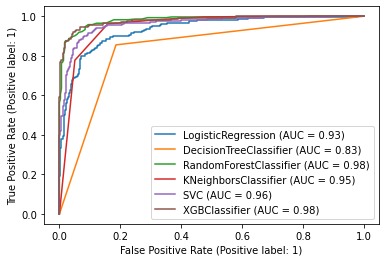

In [74]:
#Lets plot roc curve and check auc and performance of all algorithms
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(LR, x_test, y_test)
plot_roc_curve(dt, x_test, y_test, ax = disp.ax_)
plot_roc_curve(rf, x_test, y_test, ax = disp.ax_)
plot_roc_curve(kn, x_test, y_test, ax = disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax = disp.ax_)
plot_roc_curve(xgb, x_test, y_test, ax = disp.ax_)

plt.legend(prop={"size" :10} ,loc = 'lower right')
plt.show()

* RandomForestClassifier and XGBclassifier is giving good performance compared to other algorithms, with AUC arround 0.98.

In [76]:
grid_params = {
               'criterion':['gini','entropy'],
                'max_depth': [5,9,10,12,15],
                'n_estimators':[100,200,500,700],
                'max_features':['aoto','sqrt','log2'],
                'min_samples_split': [2,3,4,6]
                }

In [77]:
GCV =  GridSearchCV(RandomForestClassifier(), grid_params, cv = 5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 9, 10, 12, 15],
                         'max_features': ['aoto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4, 6],
                         'n_estimators': [100, 200, 500, 700]})

In [78]:
GCV.best_params_       #printing the best parameters found by GridSearchCV

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'log2',
 'min_samples_split': 2,
 'n_estimators': 700}

In [80]:
#Let's train and test our model using best parameters
model = RandomForestClassifier(criterion='gini', max_depth=15, max_features='log2', n_estimators=700, min_samples_split = 2)

model.fit(x_train,y_train)
pred = model.predict(x_test)

print(f"Accuracy Score: {accuracy_score(y_test,pred)*100}%")
print("---------------------------------------------------")

print(f"roc_auc_score: {roc_auc_score(y_test,pred_rf)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred)}\n")
print("---------------------------------------------------")

print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred)}")
print("---------------------------------------------------")


Accuracy Score: 94.64594127806562%
---------------------------------------------------
roc_auc_score: 92.53473880240665%
---------------------------------------------------
Confusion Matrix : 
 [[285  11]
 [ 20 263]]

---------------------------------------------------
CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       296
           1       0.96      0.93      0.94       283

    accuracy                           0.95       579
   macro avg       0.95      0.95      0.95       579
weighted avg       0.95      0.95      0.95       579

---------------------------------------------------


* Greate we have improved our accuracy from __92.57%__ to __94.65%__, by hyperparameter tuning

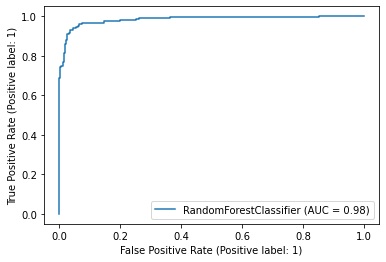

In [81]:
#Lets check our model performance after hyperparameter tuning by plottin 
plot_roc_curve(model, x_test, y_test)

* we can see our model is showing better performance now compared to previous.

## Saving the model

In [82]:
import joblib
joblib.dump(model,"HR_Analytics.pkl")

['HR_Analytics.pkl']